## Visualising representation of women and men from Google's public data

See: https://diversity.google/annual-report/representation/

Datasource: [Big Query dataset](https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/google-diversity-annual-report?q=search&referrer=search&project=bigquery-public-data)

Caveat: Not sure why there are only two global genders given, and why they are called "female" and "male". Google claims that they do self-report on a wider range of genders.

In [89]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [90]:
# How to fetch this data
# 1. Load the public dataset in Big Query. Explort the table dar_non_intersectional_representation as a csv file
df = pd.read_csv('google_dei_dar_non_intersectional_representation.csv')
df

,workforce,report_year,race_asian,race_black,race_hispanic_latinx,race_native_american,race_white,gender_us_female,gender_us_male,gender_global_female,gender_global_male
0,representation_overall,2014,0.315,0.024,0.045,0.010,0.645,0.290,0.710,0.306,0.694
1,representation_overall,2015,0.327,0.025,0.049,0.010,0.629,0.292,0.708,0.306,0.694
2,representation_overall,2016,0.339,0.028,0.052,0.008,0.610,0.293,0.707,0.306,0.694
3,representation_overall,2017,0.363,0.028,0.053,0.008,0.585,0.295,0.705,0.308,0.692
4,representation_overall,2018,0.381,0.030,0.053,0.008,0.566,0.298,0.702,0.309,0.691
5,representation_overall,2019,0.398,0.033,0.057,0.008,0.544,0.310,0.690,0.316,0.684
6,representation_overall,2020,0.419,0.037,0.059,0.008,0.517,0.316,0.684,0.320,0.680
7,representation_overall,2021,0.423,0.044,0.064,0.008,0.504,0.322,0.678,0.325,0.675
8,representation_tech,2014,0.351,0.015,0.036,0.008,0.623,0.174,0.826,0.166,0.834
9,representation_tech,2015,0.364,0.016,0.040,0.008,0.606,0.189,0.811,0.180,0.820


In [92]:
df_tech = df[df["workforce"] == "representation_tech" ].copy()
df_tech

,workforce,report_year,race_asian,race_black,race_hispanic_latinx,race_native_american,race_white,gender_us_female,gender_us_male,gender_global_female,gender_global_male
8,representation_tech,2014,0.351,0.015,0.036,0.008,0.623,0.174,0.826,0.166,0.834
9,representation_tech,2015,0.364,0.016,0.040,0.008,0.606,0.189,0.811,0.180,0.820
10,representation_tech,2016,0.381,0.017,0.041,0.006,0.587,0.200,0.800,0.191,0.809
11,representation_tech,2017,0.406,0.018,0.042,0.006,0.561,0.211,0.789,0.202,0.798
12,representation_tech,2018,0.428,0.019,0.043,0.006,0.536,0.224,0.776,0.214,0.786
13,representation_tech,2019,0.451,0.021,0.045,0.007,0.511,0.238,0.762,0.229,0.771
14,representation_tech,2020,0.476,0.024,0.048,0.007,0.481,0.247,0.753,0.236,0.764
15,representation_tech,2021,0.483,0.029,0.053,0.007,0.466,0.257,0.743,0.246,0.754


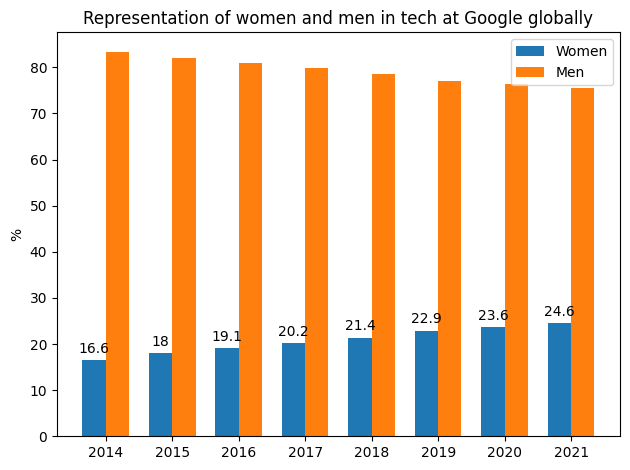

In [93]:
labels = list(df_tech['report_year'].unique()) #.map(lambda x: str(x))
labels = list(map(str, labels))

women_percentages = df_tech["gender_global_female"].values * 100
men_percentages = df_tech["gender_global_male"].values * 100

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, women_percentages, width=width, label='Women')
rects2 = ax.bar(x + width/2, men_percentages, width=width, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Representation of women and men in tech at Google globally')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig